# Week 4 Assigmnent - Dimension Reduction

**Grad 509: Dimensionality Reduction Assignment**

Make sure you can copy and run the code below, obtaining similar results to those presented here. You will need to download the image ladybug.jpg from Brightspace.
Once you have successfully run the code, please attempt to answer the questions at the bottom.

In [1]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
#X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]
X_train.shape

/Users/brunocavagnaro/MS_PURDUE_DS/GRAD_50900_AppliedMachineLearning/app_ml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:74: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


(60000, 784)

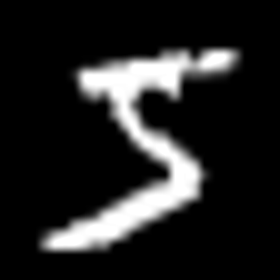

In [3]:
import PIL
from PIL import Image
# Plot the first image. Here we reshape the image from a 784 long vector to a 28-by-28 grid
# Since this is quite small to look at, we scale it up to 280-by-280 by interpolating. This is only
# needed for visualization
display(Image.fromarray((X_train[0,:]).astype('uint8').reshape((28,28))).resize((280, 280)))

In [4]:
import numpy as np
# This is the "average image". Try visualizing it
mu = np.mean(X_train, axis=0)
# Subtract out the mean image from each image
X_train = X_train - mu

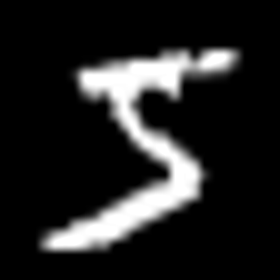

In [5]:
# To view the first image, we now must add back the mean
display(Image.fromarray((X_train[0,:]+mu).astype('uint8').reshape((28,28))).resize((280, 280)))

In [6]:
from sklearn.decomposition import PCA
# Use PCA to reduce the dimensionality from 784 to 75 (about 10%)
pca = PCA(n_components=75)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(60000, 75)

In [7]:
# Project the 75-d data back to the 784-d space
X_recovered = pca.inverse_transform(X_reduced)

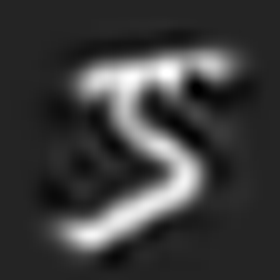

In [8]:
# Plot the first image. We first shift and rescale it to lie between 0 and 255
# Add back mean

X_rec_plt = X_recovered[0,:]+mu
# Rescale
X_rec_plt = X_rec_plt - X_rec_plt.min()
X_rec_plt = X_rec_plt*255/X_rec_plt.max()
display(Image.fromarray((X_rec_plt).astype('uint8').reshape((28,28))).resize((280, 280)))

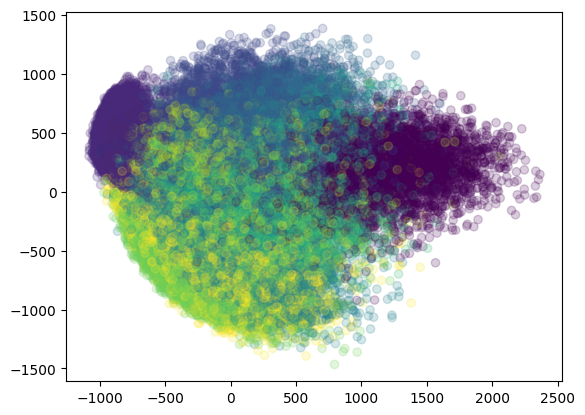

In [9]:
# Project the data down to 2d and plot a scatterplot of the images
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:,0], X_reduced[:,1],c=y_train.astype('int'),alpha=0.2)

## Question Part 1

**1. Comment on the scatterplot above Do you think the clustering of images look reasonable? Do you think 2-dimensions is enough? Explain your answers. How might you visualize the dataset better?**

**2. For any image, choose a "reconstruction error" between the original and reconstructed images. For a range of dimensions between 1 and 784 plot the total reconstruction error of the dataset vs dimension. Comment on what dimensionality you think represents a good trade-off between compression and accuracy.**

**3. Visualize the mean image of all digits. For a reconstruction error corresponding to squared error, this is the best "zero-dimensional" representation of the data (i.e. one where all images have the same representation). Comment on any features of the mean you find notable.**

### 1. Comment on the scatterplot above Do you think the clustering of images look reasonable? Do you think 2-dimensions is enough? Explain your answers. How might you visualize the dataset better?

Based on the initial plot, it seems that most digits are intertwined, and is difficult to distinguish between them in two dimensions. 

Reasonable for unsupervised, linear variance directions: yes—there’s visible structure and some class affinity. Reasonable for clean class separation: not really—expect significant overlap because PCA isn’t trained to separate classes, only to maximize variance.


To complement this, i would plot the same graph, but with the legend, and also lets explore "The Explained Variance Ratio" of the PCA, to see if two dimensions is enough.

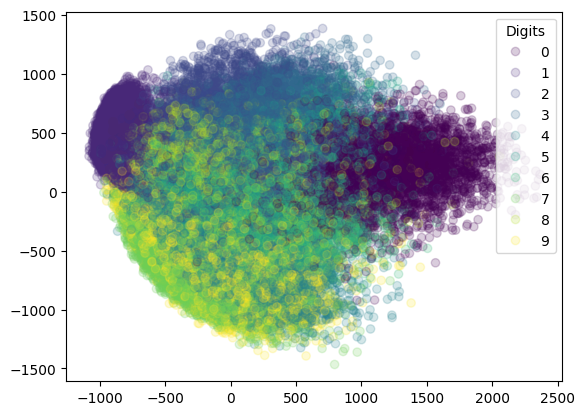

In [12]:
# Project the data down to 2d and plot a scatterplot of the images
import matplotlib.pyplot as plt

scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1],c=y_train.astype('int'),alpha=0.2)

plt.legend(*scatter.legend_elements(), loc="upper right", title='Digits')
plt.show()

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_

In [14]:
explained_variance_ratio

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

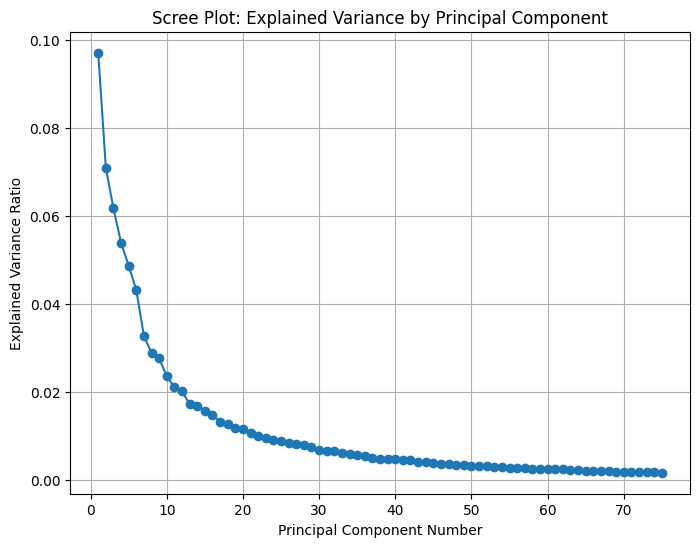

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

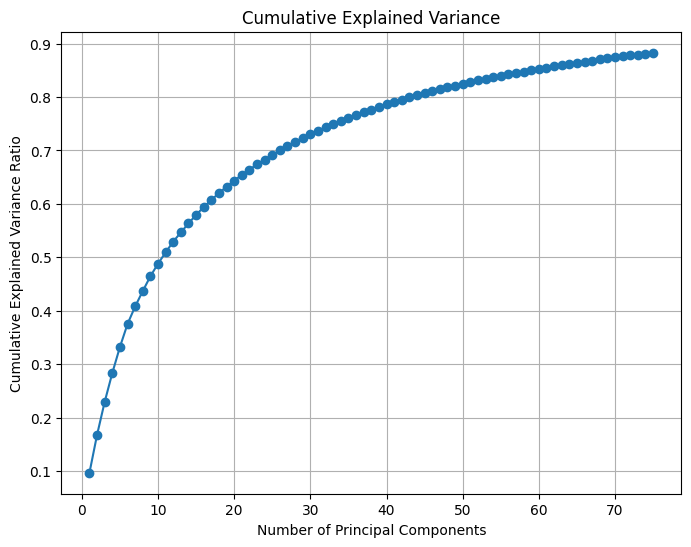

In [16]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

As we see on the explain variance, using only the first 2 dimensions, explains 17% of the whole dataset variance. And looking at the Cummulative Explained Variance, to get to a reasonable level of variance explain (about 80%), we need more than 40 components to get it. 

Now if we want to use it for visualization analysis, it would be infeasable to use PCA to correctly visualize this data. 


**How to visualize the dataset better**

- Use more dimensions (top 50 principal components to capture most variance), then reduce nonlinearly for display (run t-SNE or UMAP on those PCs for visualization). This combination denoises first, then preserves neighborhood structure, usually producing well-separated digit clusters.

    *For fairness, compare three plots side-by-side: PCA(2), t-SNE(2) on PCA(50), UMAP(2) on PCA(50).*


- Try alternative linear/nonlinear views:
    - Kernel PCA (RBF) for a nonlinear twist with a PCA-like feel.
    - Isomap or PHATE if you want to emphasize manifold structure.

### 2. For any image, choose a "reconstruction error" between the original and reconstructed images. For a range of dimensions between 1 and 784 plot the total reconstruction error of the dataset vs dimension. Comment on what dimensionality you think represents a good trade-off between compression and accuracy.

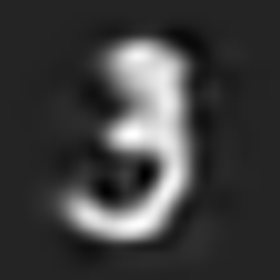

In [17]:
# IMAGE 11:

X_rec_plt = X_recovered[10,:]+mu
# Rescale
X_rec_plt = X_rec_plt - X_rec_plt.min()
X_rec_plt = X_rec_plt*255/X_rec_plt.max()
display(Image.fromarray((X_rec_plt).astype('uint8').reshape((28,28))).resize((280, 280)))

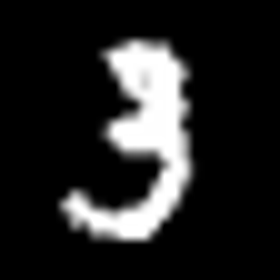

In [18]:
# REFERENCE, ORIGINAL IMAGE:
display(Image.fromarray((X_train[10,:]+mu).astype('uint8').reshape((28,28))).resize((280, 280)))

In [32]:
# Estimation of Reconstruction Error:

def reconstruction_mse_curve(X, pca_model, ks, n):
    
    X_sub = X[n,:].reshape(1, -1)

    # Pre-compute transform in full PC space once
    Z = pca_model.transform(X_sub)  # scores in all 784 PCs
    mean = pca_model.mean_

    errs = []
    for k in range(ks):
        # Reconstruct using the first k components only
        # Equivalent to zeroing out the remaining scores
        Zk = Z[:, :k]
        Wk = pca_model.components_[:k, :]
        Xhat = np.dot(Zk, Wk) + mean

        e = ((X_sub - Xhat) ** 2).mean(axis=1).mean() / 1.0  # MSE per image (avg of per-pixel)
        # Note: .mean(axis=1).mean() = total sum / (subset * n_features)
        errs.append(e)
    return np.array(errs)

In [33]:
errors = reconstruction_mse_curve(X=X_train, pca_model=pca, n=10, ks=75)

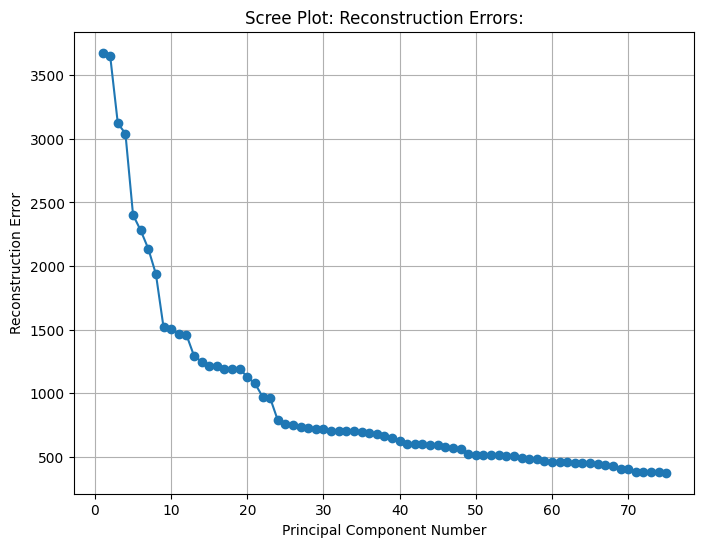

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(errors)+1), errors, marker='o', linestyle='-')
plt.title('Scree Plot: Reconstruction Errors:')
plt.xlabel('Principal Component Number')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

From the plot, we see a rapid reduction of Reconstruction Error as we add more principal components. By using the "elbow row", this reduction "plateau" around 24 components. Complementing this with the explained variance plot, we see that 24 components explained around 65% of the variance.

### 3. Visualize the mean image of all digits. For a reconstruction error corresponding to squared error, this is the best "zero-dimensional" representation of the data (i.e. one where all images have the same representation). Comment on any features of the mean you find notable.

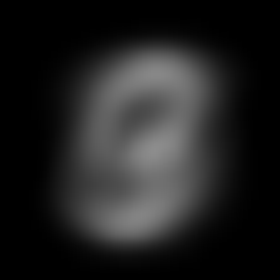

In [40]:
display(Image.fromarray((mu).astype('uint8').reshape((28,28))).resize((280, 280)))

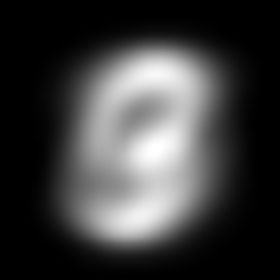

In [38]:
X_rec_plt = mu
# Rescale
X_rec_plt = X_rec_plt - X_rec_plt.min()
X_rec_plt = X_rec_plt*255/X_rec_plt.max()
display(Image.fromarray((X_rec_plt).astype('uint8').reshape((28,28))).resize((280, 280)))

After ploting the mean, we can see a soft “0”-like ring in the center. Most digits are written with strokes forming a central loop/oval (0, 6, 8, 9) or curved mass (3, 5). That shared structure survives averaging, so the mean looks like a blurry donut.

- Interpretation: As expected under squared error, the mean image is the optimal 0-D summary. It reveals where strokes most commonly occur: a central oval plus a vertical corridor from frequent ‘1’-like strokes.

- Dataset/process clue: The bright corners and centered mass confirm MNIST’s centering/normalization.

- Limitation: Averages blur class-specific features (hooks of ‘2’, crossbar of ‘7’, closed loops of ‘8’). The mean is informative about common stroke regions, not about any particular digit.

## Question Part 2

**1. Comment on the scatterplot above generated using isamap**

**2. Look at the documentation of the Isomap function and play around with a parameters you understand. Note down your thoughts briefly**

In [19]:
# Use isomap to perform nonlinear dimensionality reduction
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
# Since this is slower, use a smaller dataset
X_isomap = embedding.fit_transform(X_train[:5000])
X_isomap.shape

(5000, 2)

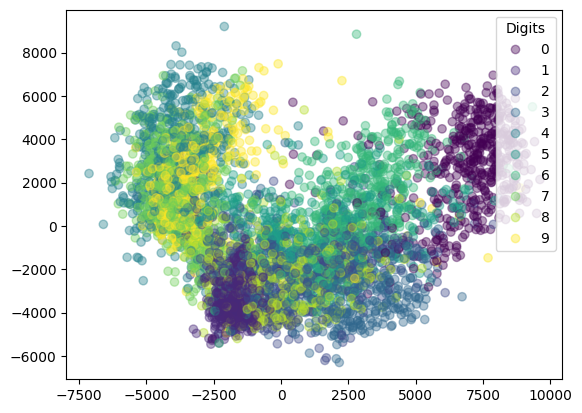

In [41]:
scatter = plt.scatter(X_isomap[:,0], X_isomap[:,1],c=y_train[:5000].astype('int'),alpha=0.4)
plt.legend(*scatter.legend_elements(), loc="upper right", title='Digits')
plt.show()

### 1. Comment on the scatterplot above generated using isamap

After looking at the graph, we can see more global structure than PCA, broad arcs where similar digits curve around each other; some classes (0, 1, 6) appear as semi-separate lobes, while lookalikes (4/9, 3/8, 5/6, 7/9) bleed together. Because geodesics respect manifold curvature, you often see elongated shapes that reflect stroke thickness. 

**Is 2D Isomap “good” here?**
For class separation: middling. It does not produce clean, class-pure blobs, but clearer than PCA about broad topology (e.g., round vs. vertical strokes).

### 2. Look at the documentation of the Isomap function and play around with a parameters you understand. Note down your thoughts briefly

After looking at the documentation from Scikit-Learn: [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

We can see that an important parameter is the **n_neighbor**. So we could generate multiple plots, using different number of neighbours and look at the impact:

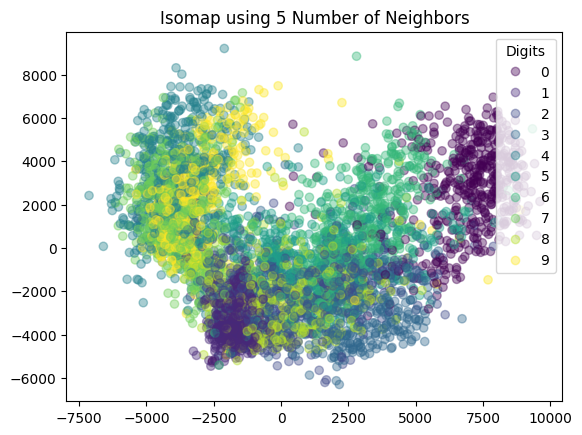

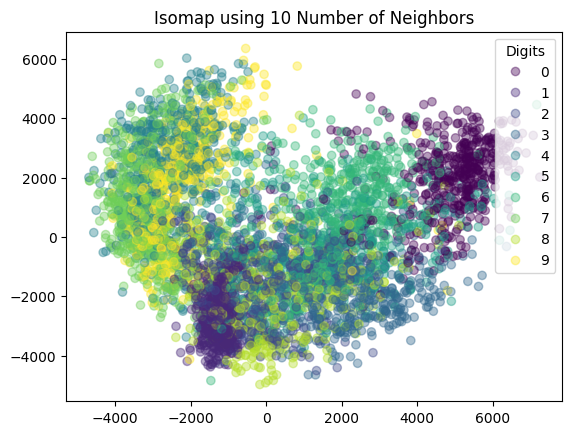

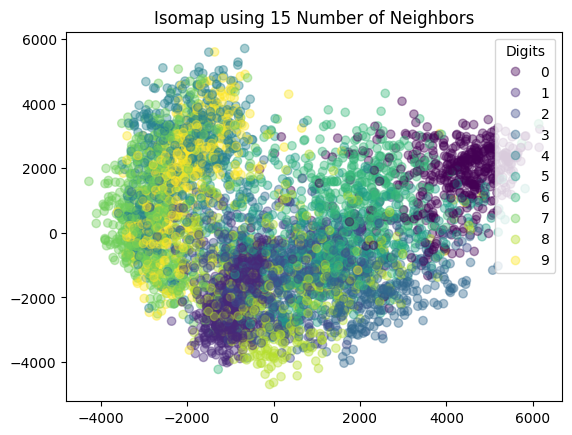

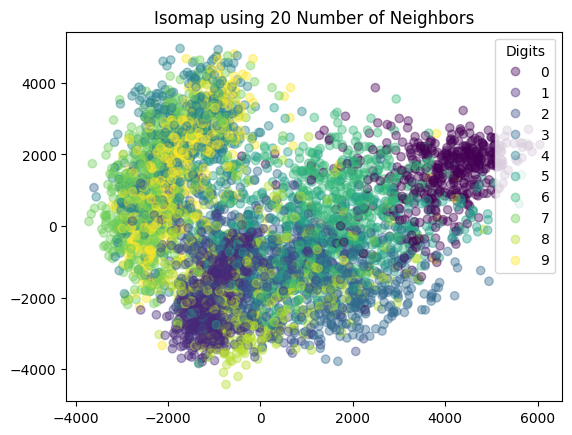

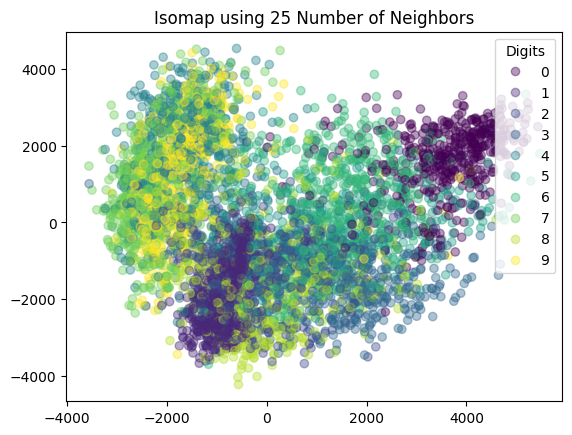

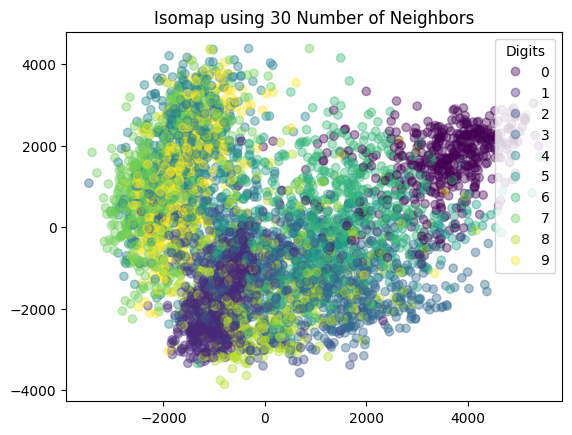

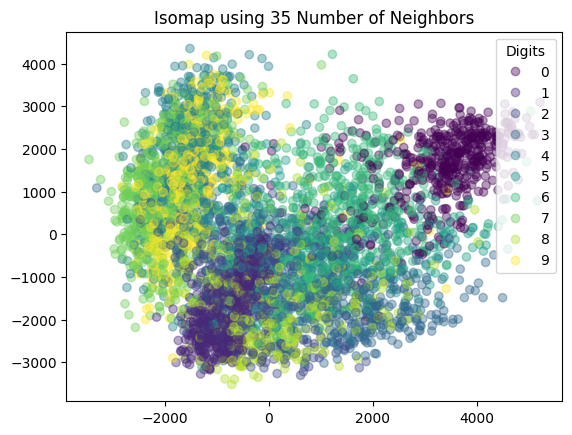

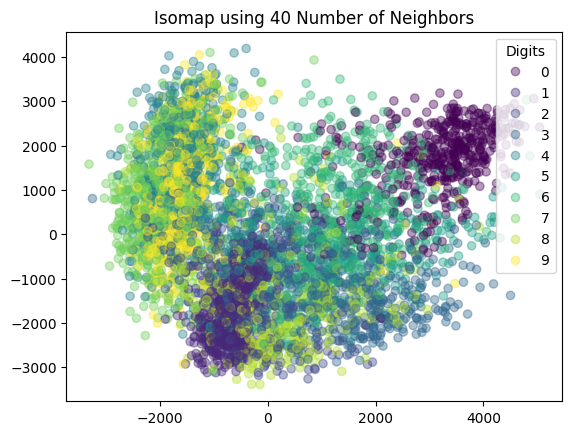

In [44]:
for i in range(5, 41, 5):
    embedding = Isomap(n_components=2,n_neighbors=i)
    # Since this is slower, use a smaller dataset
    X_isomap = embedding.fit_transform(X_train[:5000])

    scatter = plt.scatter(X_isomap[:,0], X_isomap[:,1],c=y_train[:5000].astype('int'),alpha=0.4)
    plt.legend(*scatter.legend_elements(), loc="upper right", title=f'Digits')
    plt.title(f"Isomap using {i} Number of Neighbors")
    plt.show()

We see that increasing the number of neighbours to 10, improve class purity, but as we continiously increasing the number of neighbours, the global structure becomes less "broad arcs", ending looking similar to PCA 